<a href="https://colab.research.google.com/github/Dhananjaysi10/Image-Classification/blob/main/ML_Minor_March_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
!pip install bing-image-downloader
!mkdir images


In [3]:

from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=10,output_dir='images',
                    adult_filter_off=True)
downloader.download("rugby ball leather",limit=10,output_dir='images',
                    adult_filter_off=True)
downloader.download("dogs",limit=10,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://farm6.staticflickr.com/5213/5521196792_311c527bec_z.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://emmalovesweddings.com/wp-content/uploads/2019/08/chic-rustic-wedding-cake-with-sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://patchoguearts.org/wp-content/uploads/Pretty-Sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-5RWvg7Dj3Og/Tow-3Dc30lI/AAAAAAAAinM/jJmDpg9Fvms/s1600/sunflowercenter1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://farm6.staticflickr.com/5180/5520594277_c928c1214f_z.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/5c/e6/e9/5ce6e9ae6c8cbe70615cd1a893e51c00--girl-photography-newborn-photography.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://live.staticflickr.com/2510/3924709864_95bc4aef9d.jpg
[%] File Downloaded !

[%]

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower','rugby ball leather','dogs']

for category in CATEGORIES:
 class_num = CATEGORIES.index(category) #label encoding the values
 path = os.path.join(DATADIR,category)
 for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   img_resized = resize(img_array,(150,150,3)) #Normalizes the value from 0 to 1
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

  


In [6]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [7]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [11]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([2, 2, 2, 2, 0, 2, 2, 1, 1])

In [12]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([2, 0, 2, 0, 0, 0, 2, 0, 1])

In [13]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 55.55555555555556% accurate


In [14]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter your URLhttps://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-800x825.jpg
(825, 800, 3)
 PREDICTED OUTPUT: rugby ball leather


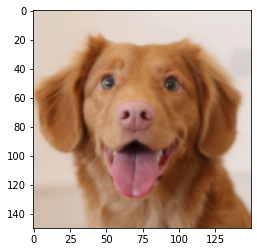

In [21]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [24]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

In [23]:
%%writefile app.py

import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')


  if st.button('PREDICT'):
    CATEGORIES = ['pretty sunflower','rugby ball leather','dogs']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}')




Writing app.py
